In [110]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import opinion_lexicon

from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob

# Import dataset

In [122]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/2024-3-31_HRA/2024-4-25_sentimentOpinion_good_translate_dependency_rule.csv')

# Extract aspect, opinion, sentiment

In [ ]:
import ast
aspect_opinion_list = []

# Iterate over the DataFrame and append list members to the new DataFrame
for index, row in df.iterrows():
  Row_Num = row['Row_Num']
  aspect = ast.literal_eval(row['aspect'])
  sentiment = ast.literal_eval(row['sentiment'])
  pairs_dependency_rule = ast.literal_eval(row['pairs_dependency_rule'])

  for aspect, sentiment in zip(aspect, sentiment):
    for pairs in pairs_dependency_rule:
      if aspect == pairs[0]:
        opinion = pairs[2]
        temp_list = [Row_Num, aspect, sentiment, opinion]
        aspect_opinion_list.append(temp_list)


In [ ]:
# Convert list of lists to DataFrame
df_aspect_opinion = pd.DataFrame(aspect_opinion_list, columns=['Row_Num', 'aspect', 'sentiment', 'opinion'])

In [ ]:
df_aspect_opinion

,Row_Num,aspect,sentiment,opinion
0,0,services,Negative,faster
1,0,services,Negative,faster
2,0,cashier,Negative,closed
3,0,services,Negative,faster
4,0,services,Negative,faster
...,...,...,...,...
2597,4747,store,Positive,clean
2598,4747,prices,Positive,reasonable
2599,4749,service,Positive,satisfying
2600,4749,price,Positive,reasonable


**Checkpoint 7**
*   Dataframe saved as 2024-4-25_aspectOpinionSentiment.csv

In [ ]:
# Save dataframe df_aspect_opinion
df_aspect_opinion.to_csv('/content/drive/MyDrive/Colab Notebooks/2024-3-31_HRA/2024-4-25_aspectOpinionSentiment.csv', index=False)

# Load Checkpoint 7

In [95]:
df_aspect_opinion = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-3-31_HRA/2024-4-25_aspectOpinionSentiment.csv')

In [96]:
df_aspect_opinion

,Row_Num,aspect,sentiment,opinion
0,0,services,Negative,faster
1,0,services,Negative,faster
2,0,cashier,Negative,closed
3,0,services,Negative,faster
4,0,services,Negative,faster
...,...,...,...,...
2597,4747,store,Positive,clean
2598,4747,prices,Positive,reasonable
2599,4749,service,Positive,satisfying
2600,4749,price,Positive,reasonable


# Normalize Aspect

In [46]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [97]:
# Initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [98]:
# Lemmatize each word in the DataFrame, except when 'aspect' is "goods"
df_aspect_opinion['aspect'] = df_aspect_opinion['aspect'].apply(lambda x: lemmatizer.lemmatize(x) if x != "goods" else x)
# Convert words to lowercase
df_aspect_opinion['aspect'] = df_aspect_opinion['aspect'].str.lower()
df_aspect_opinion['opinion'] = df_aspect_opinion['opinion'].str.lower()

In [99]:
# Do not run if updating replacement words
unique_aspect = df_aspect_opinion['aspect'].unique()
df_unique_aspect = pd.DataFrame(unique_aspect)
df_unique_aspect.to_csv('/content/drive/MyDrive/Colab Notebooks/2024-3-31_HRA/2024-4-27_unique_aspect_raw.csv')

In [100]:
# Replace unique word in dictionary
df_replacement_aspect = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-3-31_HRA/2024-4-27_unique_aspect.csv')

In [101]:
# Create a dictionary from the original DataFrame for mapping
replace_dict = dict(zip(df_replacement_aspect['aspect_word'], df_replacement_aspect['change']))
replace_dict

{'ac': 'HVAC',
 'admin': 'Administrative staff',
 'administrative staff': 'Administrative staff',
 'air circulation': 'HVAC',
 'air conditioner': 'HVAC',
 'air flow': 'HVAC',
 'attitude': 'Sales staff',
 'car park': 'Parking area',
 'car park space': 'Parking area',
 'car parking': 'Parking area',
 'car parking area': 'Parking area',
 'car parking capacity': 'Parking area',
 'cashier': 'Cashier section',
 'cashier employees': 'Cashier section',
 'cashier lady': 'Cashier section',
 'cashier line': 'Cashier section',
 'cashier queue': 'Cashier section',
 'cashier queues': 'Cashier section',
 'cashier service': 'Cashier section',
 'cashiers': 'Cashier section',
 'central ac': 'HVAC',
 'checkout line': 'Cashier section',
 'customer service': 'Customer service staff',
 'customer service staff': 'Customer service staff',
 'employee': 'Sales staff',
 'female parking attendant': 'Parking attendant',
 'female security guard': 'Security staff',
 'girl': 'Sales staff',
 'goods': 'Items',
 'guard'

In [102]:
# Replace words in the 'Words' column if they are present in the original DataFrame
df_aspect_opinion['aspect'] = df_aspect_opinion['aspect'].replace(replace_dict)

In [103]:
df_aspect_opinion

,Row_Num,aspect,sentiment,opinion
0,0,Sales staff,Negative,faster
1,0,Sales staff,Negative,faster
2,0,Cashier section,Negative,closed
3,0,Sales staff,Negative,faster
4,0,Sales staff,Negative,faster
...,...,...,...,...
2597,4747,store,Positive,clean
2598,4747,Price,Positive,reasonable
2599,4749,Sales staff,Positive,satisfying
2600,4749,Price,Positive,reasonable


In [121]:
tes_filter = df_aspect_opinion[df_aspect_opinion['opinion'] == 'fierce']
tes_filter

,Row_Num,aspect,sentiment,opinion
1006,2100,Cashier section,Positive,fierce


In [129]:
tes_filter = df[df['Row_Num'] == 2100]
tes_filter['sentence'][958]

"From there , it ' s crazy . The queues are great , but it feels good in my heart . Today , the cashier is very fierce . On the right side , number 2 from the queue of cashiers in front , always keep your distance only in the cashier area . Pay attention to the customer area . Don ' t keep your distance . The goods are neatly arranged . The area is too narrow . I prefer the one on Jalan Solo . The cashiers are friendly . The area is also spacious , and if it ' s crowded there , use a queue to enter . I prefer the one on Jalan Solo ."

# Filter Negative and Positive Aspect

In [104]:
#@title Aspect with negative sentiment
# Filter the DataFrame > Negative Sentiment
df_aspect_opinion_negative = df_aspect_opinion[df_aspect_opinion['sentiment'] == 'Negative']
# Remove duplicates based on two columns
df_aspect_opinion_negative = df_aspect_opinion_negative.drop_duplicates(subset=['aspect', 'opinion'])
# Count occurrences of unique values in the 'aspect' column > Negative
counts_unique_negative = df_aspect_opinion_negative['aspect'].value_counts().reset_index()
# Rename columns
counts_unique_negative.columns = ['aspect', 'count']

In [105]:
counts_unique_negative.head(10)

,aspect,count
0,Cashier section,66
1,Parking area,48
2,Sales staff,41
3,Parking attendant,31
4,Security staff,20
5,place,18
6,Price,13
7,Items,12
8,store,7
9,Management,5


In [106]:
#@title Aspect with positive sentiment
# Filter the DataFrame > Positive Sentiment
df_aspect_opinion_positive = df_aspect_opinion[df_aspect_opinion['sentiment'] == 'Positive']
# Remove duplicates based on two columns
df_aspect_opinion_positive = df_aspect_opinion_positive.drop_duplicates(subset=['aspect', 'opinion'])
# Count occurrences of unique values in the 'aspect' column > Positive
counts_unique_positive = df_aspect_opinion_positive['aspect'].value_counts().reset_index()
# Rename columns
counts_unique_positive.columns = ['aspect', 'count']

In [107]:
counts_unique_positive.head(10)

,aspect,count
0,place,45
1,Price,35
2,Parking area,33
3,Sales staff,27
4,Cashier section,17
5,Items,14
6,store,14
7,shopping,13
8,discount,10
9,supermarket,9


# Create Pareto Chart

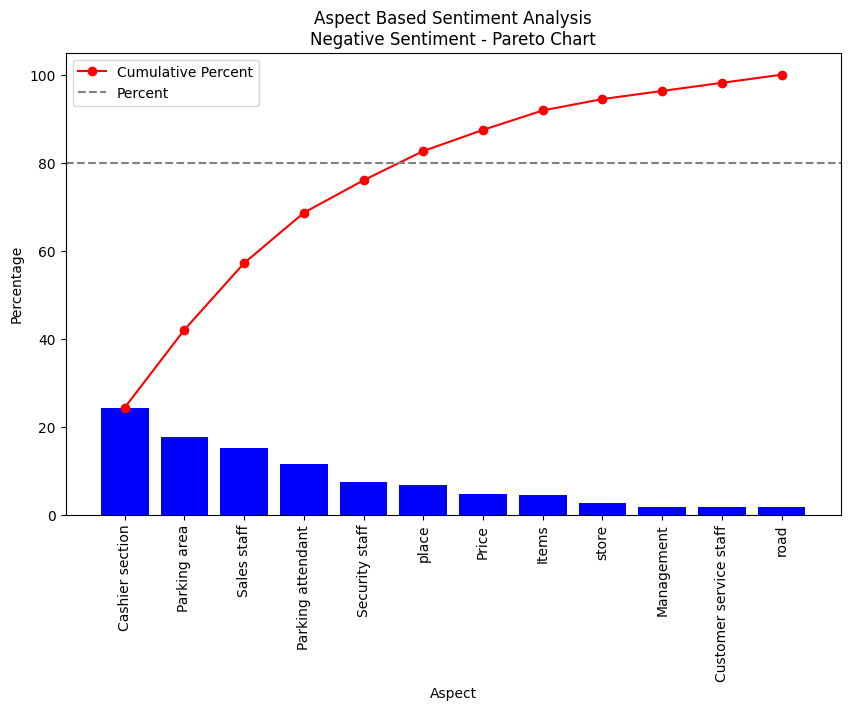

In [108]:
#@title Negative Pareto Chart
x = 5
# Filter rows where 'count' is greater than 10
counts_unique_negative_greater_than_x = counts_unique_negative[counts_unique_negative['count'] >= x]
counts_unique_negative_greater_than_x = counts_unique_negative_greater_than_x.copy()
# Calculate total count
total_count = counts_unique_negative_greater_than_x['count'].sum()

# Calculate percentage
counts_unique_negative_greater_than_x['percent'] = (counts_unique_negative_greater_than_x['count'] / total_count) * 100
# Sort DataFrame by percentages in descending order
counts_unique_negative_greater_than_x = counts_unique_negative_greater_than_x.sort_values(by='percent', ascending=False)
# Calculate cumulative sum of percentages
counts_unique_negative_greater_than_x['cumulative_percent'] = counts_unique_negative_greater_than_x['percent'].cumsum()

# Calculate 80% of total count
# Find the first row where cumulative percentage exceeds 80
# eighty_percent_negative = counts_unique_negative_greater_than_x[counts_unique_negative_greater_than_x['cumulative_percent'] >= 80].iloc[0]
eighty_percent_negative_val = 80
# Plot Pareto chart
plt.figure(figsize=(10, 6))
plt.bar(counts_unique_negative_greater_than_x['aspect'], counts_unique_negative_greater_than_x['percent'], color='blue')
plt.plot(counts_unique_negative_greater_than_x['aspect'], counts_unique_negative_greater_than_x['cumulative_percent'], color='red', marker='o')
plt.axhline(y=eighty_percent_negative_val, color='gray', linestyle='--', label='80% of Total Count')
plt.xticks(rotation=90)
plt.xlabel('Aspect')
plt.ylabel('Percentage')
plt.title('Aspect Based Sentiment Analysis\nNegative Sentiment - Pareto Chart')
plt.legend(['Cumulative Percent', 'Percent'])
plt.show()

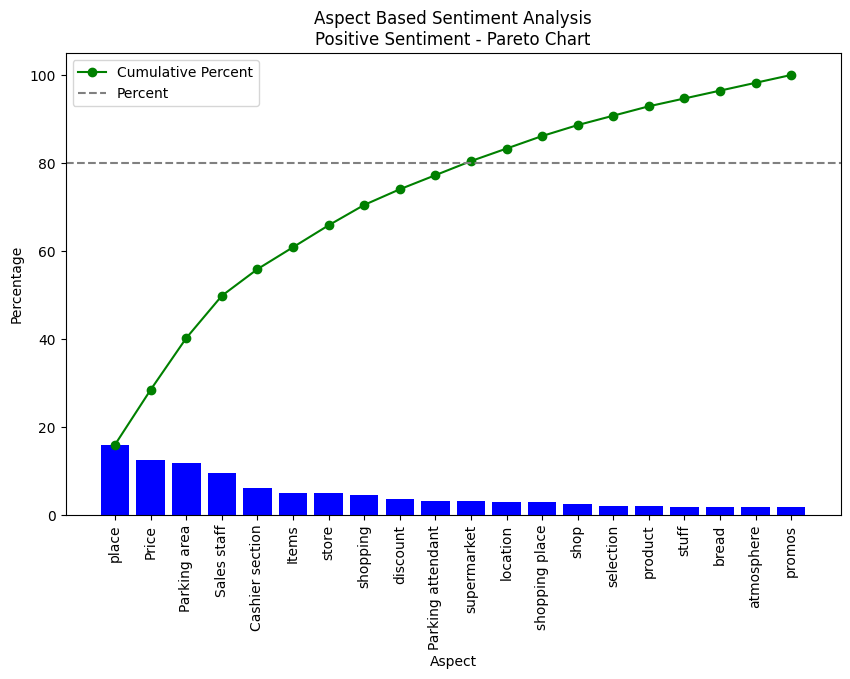

In [109]:
#@title Positive Pareto Chart
x = 5
# Filter rows where 'count' is greater than 10
counts_unique_positive_greater_than_x = counts_unique_positive[counts_unique_positive['count'] >= x]
counts_unique_positive_greater_than_x = counts_unique_positive_greater_than_x.copy()
# Calculate total count
total_count = counts_unique_positive_greater_than_x['count'].sum()

# Calculate percentage
counts_unique_positive_greater_than_x['percent'] = (counts_unique_positive_greater_than_x['count'] / total_count) * 100
# Sort DataFrame by percentages in descending order
counts_unique_positive_greater_than_x = counts_unique_positive_greater_than_x.sort_values(by='percent', ascending=False)
# Calculate cumulative sum of percentages
counts_unique_positive_greater_than_x['cumulative_percent'] = counts_unique_positive_greater_than_x['percent'].cumsum()

# Calculate 80% of total count
# Find the first row where cumulative percentage exceeds 80
# eighty_percent_positive = counts_unique_positive_greater_than_x[counts_unique_positive_greater_than_x['cumulative_percent'] >= 80].iloc[0]
eighty_percent_positive_val = 80
# Plot Pareto chart
plt.figure(figsize=(10, 6))
plt.bar(counts_unique_positive_greater_than_x['aspect'], counts_unique_positive_greater_than_x['percent'], color='blue')
plt.plot(counts_unique_positive_greater_than_x['aspect'], counts_unique_positive_greater_than_x['cumulative_percent'], color='green', marker='o')
plt.axhline(y=eighty_percent_positive_val, color='gray', linestyle='--', label='80% of Total Count')
plt.xticks(rotation=90)
plt.xlabel('Aspect')
plt.ylabel('Percentage')
plt.title('Aspect Based Sentiment Analysis\nPositive Sentiment - Pareto Chart')
plt.legend(['Cumulative Percent', 'Percent'])
plt.show()

# Create Wordcloud

In [111]:
# Download the opinion lexicon if not already downloaded
nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Based on the **Negative Pareto Chart**, there are several aspects related to Human Resource:
*   Cashier section
*   Sales staff
*   Parking attendant
*   Security staff

Aspect:  Cashier section


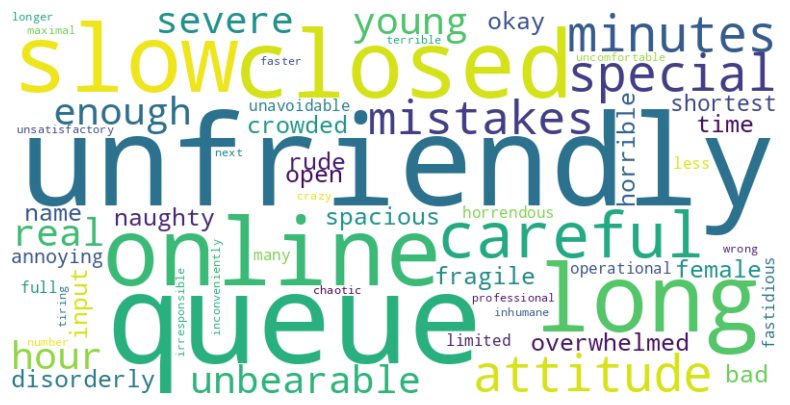

--------------------------------------------------------------------
Aspect:  Sales staff


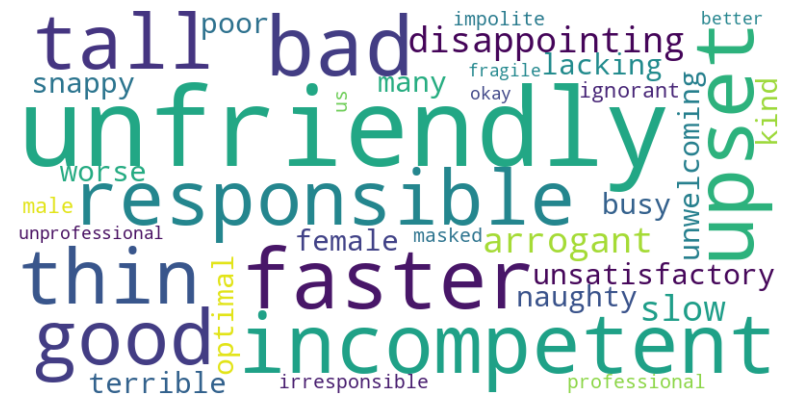

--------------------------------------------------------------------
Aspect:  Parking attendant


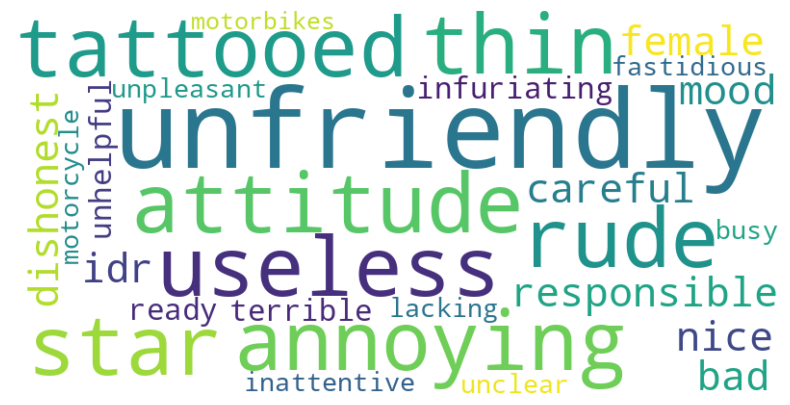

--------------------------------------------------------------------
Aspect:  Security staff


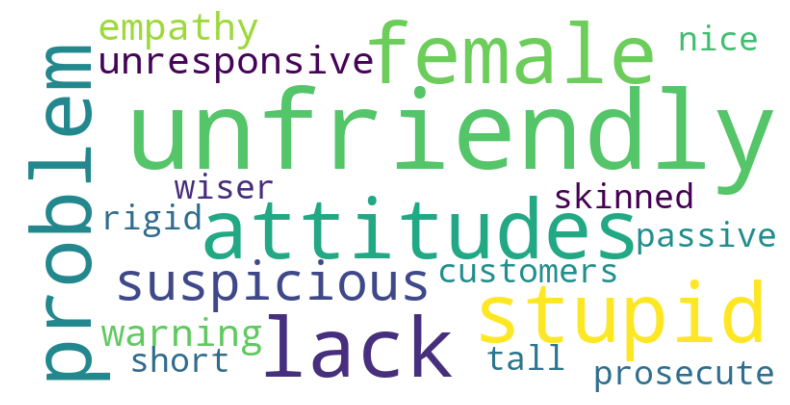

--------------------------------------------------------------------


In [116]:
#@title Negative Wordcloud
HR_negative_aspect = ['Cashier section', 'Sales staff', 'Parking attendant', 'Security staff']

for aspect in HR_negative_aspect:
  # Load positive and negative words from the opinion lexicon
  positive_words = set(opinion_lexicon.positive())
  negative_words = set(opinion_lexicon.negative())

  # Define the sentiment mapping based on the opinion lexicon
  sentiment_mapping = {}
  for positive_word in positive_words:
      for negative_word in negative_words:
          if positive_word in negative_word:
              sentiment_mapping[positive_word] = negative_word
              break

  # Get opinion list for every aspect
  negative_opinion_list = df_aspect_opinion_negative.loc[df_aspect_opinion['aspect'] == aspect, 'opinion'].values
  # Convert positive words to negative sentiment words based on the sentiment mapping
  negative_opinion_list = [sentiment_mapping[word] if word in sentiment_mapping else word for word in negative_opinion_list]

  opinion_text = ' '.join(negative_opinion_list)

  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opinion_text)

  print("Aspect: ", aspect)
  # Plot the WordCloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()
  print("--------------------------------------------------------------------")

Based on the **Positive Pareto Chart**, there are several aspects related to Human Resource:
*   Sales staff
*   Cashier section
*   Parking attendant

Aspect:  Sales staff


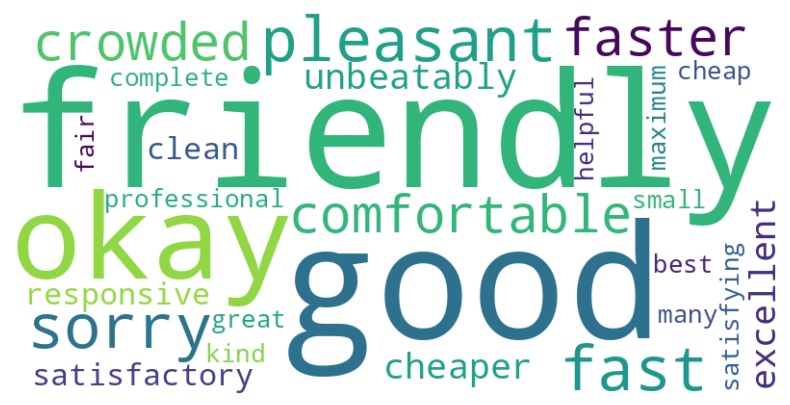

--------------------------------------------------------------------
Aspect:  Cashier section


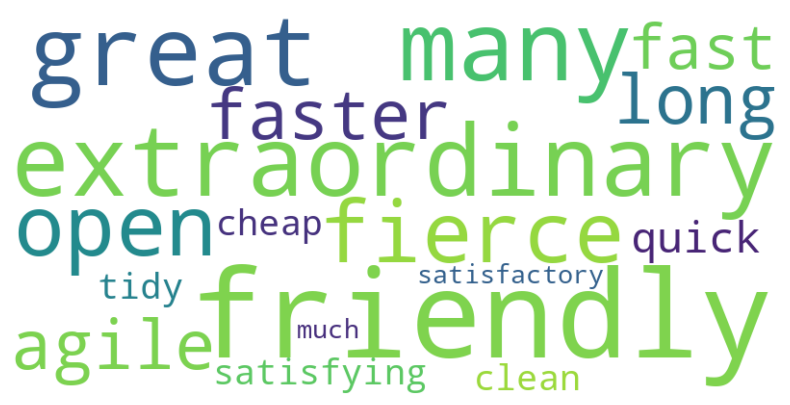

--------------------------------------------------------------------
Aspect:  Parking attendant


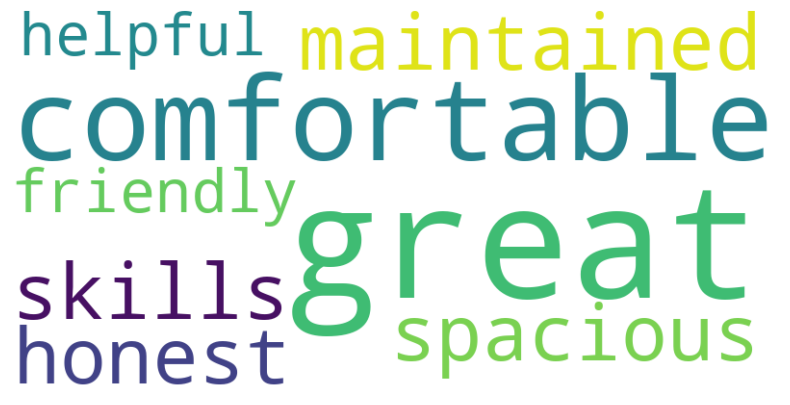

--------------------------------------------------------------------


In [119]:
#@title Positive Wordcloud
HR_positive_aspect = ['Sales staff', 'Cashier section', 'Parking attendant']

for aspect in HR_positive_aspect:
  # # Load positive and negative words from the opinion lexicon
  positive_words = set(opinion_lexicon.positive())
  negative_words = set(opinion_lexicon.negative())

  # Define the sentiment mapping based on the opinion lexicon
  sentiment_mapping = {}
  for positive_word in positive_words:
      for negative_word in negative_words:
          if positive_word in negative_word:
              sentiment_mapping[negative_word] = positive_word
              break

  # Get opinion list for every aspect
  positive_opinion_list = df_aspect_opinion_positive.loc[df_aspect_opinion['aspect'] == aspect, 'opinion'].values
  # Convert positive words to negative sentiment words based on the sentiment mapping
  positive_opinion_list = [sentiment_mapping[word] if word in sentiment_mapping else word for word in positive_opinion_list]

  opinion_text = ' '.join(positive_opinion_list)

  # Create a WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opinion_text)

  print("Aspect: ", aspect)
  # Plot the WordCloud
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()
  print("--------------------------------------------------------------------")